# Исследование объявлений о продаже квартир

## Содержание
1. Описание данных и постановка задачи
2. Загрузка, просмотр и предобработка данных
 * Объединение таблиц
 * Изменение типов данных
3. Добавление новых столбцов с параметрами
 * цена одного квадратного метра
 * день недели публикации
 * месяц публикации объявления
 * год публикации объявления
 * тип этажа
 * расстояние до центра в километрах
4. Исследовательский анализ данных
5. Вывод

### 1. Описание проекта

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Описание данных

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### 2. Загрузка, просмотр и предобработка данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

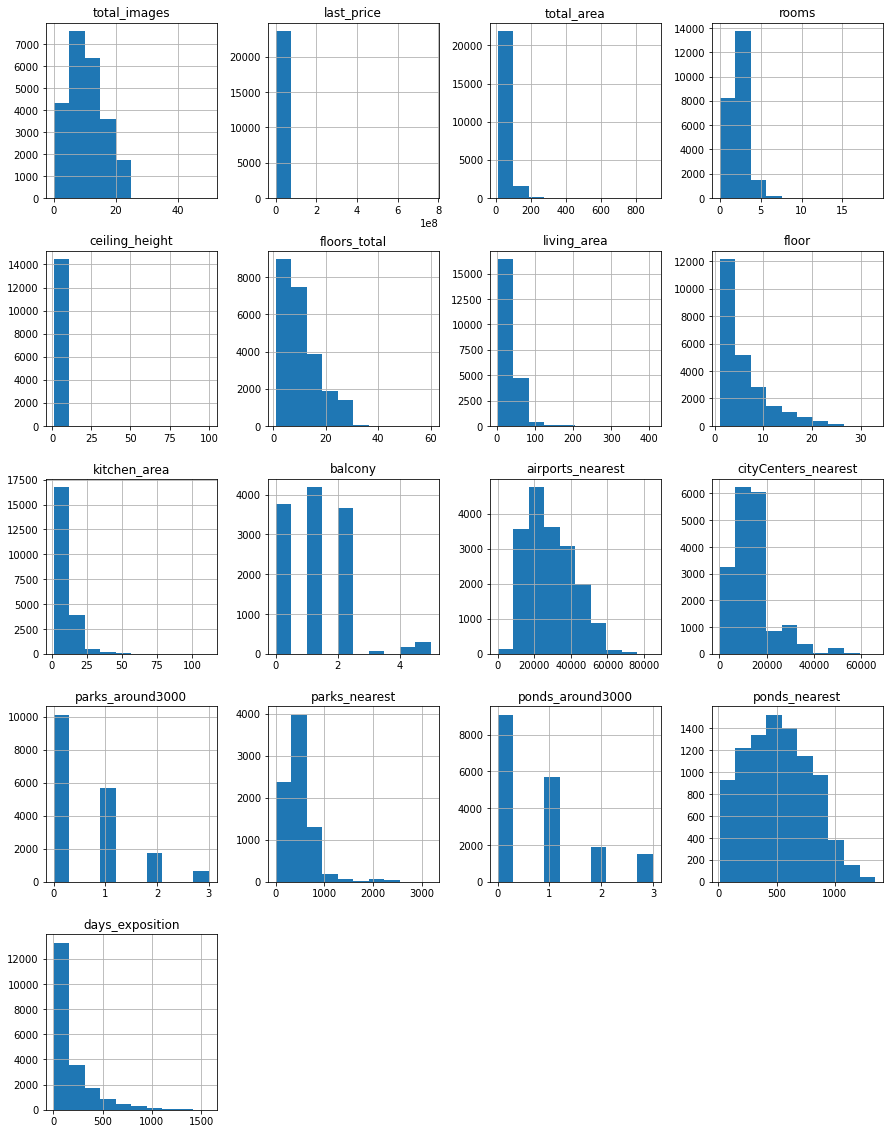

In [2]:
#1. загрузим данные из файла в датафрейм
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
#2. получим общую информацию о датафрейме, вызва метод info
data.info()
#3. построим гистограммы по всем числовым столбцам датафрейма
data.hist(figsize=(15, 20));

**Вывод:** По каждой гистограмме можно сделать вывод:
1. total_images, число фотографий в объявлении - тип данных выбран правильно, выбросов и аномалий нет. По гистограмме видно, что популярное число фотографий в объявлении от 5 до 10
2. last_price, цена на момент снятия объявления - все значения равны 0. Здесь необходимо изменить шаг гистограмму по х и тогда будет видно более наглядно какая была цена
3. rooms, число комнат - тип данных верный, выбросов и аномалий нет. Самые популярные квартиры 2-3 комнатные
4. ceiling_height, высота потолков - по гистограмме невозможно оценить количество квартир с различной высотой потолков. Нужно изменить шаг по линии х и тогда график станет читаемым.
5. floors_total, количество этажей в доме - минимально в доме может быть 1 этаж и это самый популярны тип строения. Далее количество этажей становится больше и количество квартир уменьшается.
6. living_area жилая площадь - имеет правильный тип данных, но нужно изменить шаг по линии х, чтобы можно было рассмотреть более детально какая самая популярная жилая площадь в квартире. Выбросов нет
7. floor, этаж - квартир на первых 3-4х этажах значительно больше, чем на более высоких этажах
8. kitchen_area, площадь кухни - самый популярный размер кухни в квартирах около 12.5 кв.м. Более точно можно будет сказать, если уменьшить шаг на графике и посмотрев медиану
9. balcony у столбца не верно определен тип данных так как количество балконов не может быть дробным. Также, самое популярное количество балконов - 1.
10. airports_nearest, расстояние до ближайшего аэропорта самое популярное от 18 до 25 км. Выбросов и аномалий нет
11. cityCenters_nearest, расстояние от центра города - самая большая плотность застройки находится на расстоянии от 7 до 15 км. 
12. parks_around3000, чеисло парков в радиусе 3 км - в радиусе 3 км нет парков и это наиболее популярный вариант
13. parks_nearest, расстояние до ближайшего парка - к домам, в радиусе которых есть парк, наиболее популярное располжение составляет от 300 до 600м(достаточно близко к дому)
14. ponds_around3000, число водоемов в радиусе 3 км - в радиусе 3 км самое популярное количество водоемов 0.
15. ponds_nearest расстояние до водоема - самое популярное расстояние 450-600 м.
16. days_exposition количество дней которое объявление было размещено(от публикации до снятия) - по такому графику трудно определить, поэтому необходимо будет обратиться к методу по которому можно будет определить медиану и она более точно скажет наиболее популярный и правильный вариант.

### Предобработка данных

In [3]:
#Определим в каких столбцах есть пропущенные значения и заполним их
data['balcony'] = data['balcony'].fillna(0)
data['days_exposition'] = data['days_exposition'].fillna(0)
data['floors_total'] = data['floors_total'].fillna(1)
data['is_apartment'] = data['is_apartment'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

**Вывод:** Данные количества балконов были не заполнены, так как у владельцев некоторых квартир не было балконов и поэтому они оставляли это поле пустым. Количество этажей в доме не заполнено потому что дом мог быть одноэтажным, поэтому заполняю отсутствующие значения единицей. Параметр "студия" был не заполнен, так как квартира не являлась студией и поле пропускали.


In [4]:
#В столбцах не верно определены типы данных. Сделаю замены на корректный для последующей работы
data['is_apartment'] = data['is_apartment'].astype('bool')
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод:** Изменения типа данных в выбранных строках необходимо для корректной работы с ними(цена должна быть целым числом, количество этажей в доме не может быть дробным и т.д)

In [5]:
#3. С помощью метода unique определим вручную неявные дубликаты и заменим их с помощью функции replace
data['locality_name'] = data['locality_name'].str.replace('посёлок ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('городской ', '')
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
data['locality_name'] = data['locality_name'].str.replace('село ', '')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции ', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '')
data['locality_name'] = data['locality_name'].str.replace('станции ', '')
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [6]:
#4. заменяем аномальные значения в столбце celling_height
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] / 10
len(data[data['ceiling_height'] < 2]['ceiling_height']) / len(data['ceiling_height'])
data = data[(data['ceiling_height'] < 10) | (data['ceiling_height'].isna())]
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87,
       2.66, 2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55,
       3.16, 3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95,
       4.06, 2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 ,
       3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63,
       3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19,
       3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 8.  ,
       3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 ,
       2.93, 3.46, 3.47, 3.33, 3.63, 3.32, 1.2 , 8.3 , 2.98, 2.86, 3.17,
       4.4 , 3.28, 3.04, 4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78,
       4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.

Вывод: В столбце ceiling_height содержатся аномальные значения больше 3(высота в потолков в квартирах обычно не больше 3х метров). Соответственно такие значения были преобразованы в нормальные делением на 10. Аномальность получилась из-за пропуска точки для разделения на целую и дробную часть числа.

## 3. Добавление новых столбцов с параметрами

In [16]:
#Добавляем новые столбцы для последующей работы с данными
data['price_one_mkv'] = data['last_price'] / data['total_area'] #цена одного квадратного метра
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S') #преобразование даты в формат UTC
data['week'] = pd.DatetimeIndex(data['first_day_exposition']).weekday #день недели публикации
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month #месяц публикации
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year #год публикации
#определения типа этажа: первый, последний, другой 
data['floor_type'] = 'другой'
data['floor_type'] = data['floor_type'].where(data['floor'] != 1, 'первый')
data['floor_type'] = data['floor_type'].where(data['floor'] != data['floors_total'], 'последний')
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000) #рассстояние до центра города в км с округлением до целого числа
data.head(10) #вывод первых 10 строк для наглядного отображения

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,price_one_mkv,week,month,floor_type,cityCenters_nearest_km,price_one_m
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,2019,120370.370370,3,3,другой,16.0,120370.370370
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,2018,82920.792079,1,12,первый,19.0,82920.792079
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,2015,92785.714286,3,8,другой,14.0,92785.714286
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,2015,408176.100629,4,7,другой,7.0,408176.100629
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,2018,100000.000000,1,6,другой,8.0,100000.000000
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,2018,95065.789474,0,9,другой,NaN,95065.789474
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,2017,99195.710456,3,11,другой,19.0,99195.710456
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0,2019,110544.692737,3,4,другой,12.0,110544.692737
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,2018,87454.764777,2,5,другой,NaN,87454.764777
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,2017,88524.590164,6,2,другой,15.0,88524.590164


## 4. Исследовательский анализ данных

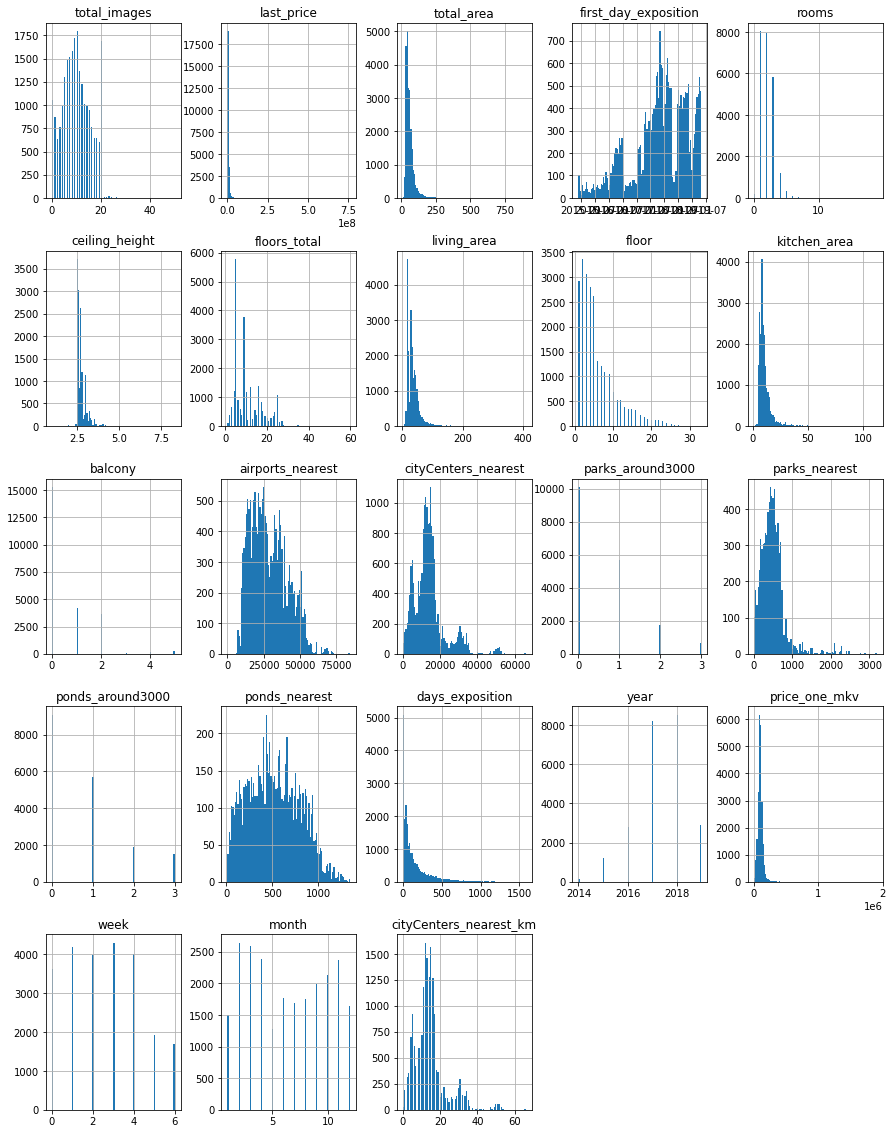

In [8]:
#1.Построим гистограммы по всем числовым столбцам датафрейма
data.hist(bins = 100, figsize=(15, 20));

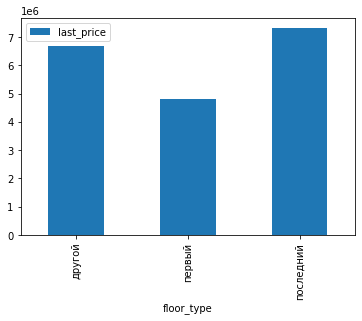

In [9]:
data.pivot_table(index='floor_type', values = 'last_price', aggfunc = 'mean').plot(kind='bar');

In [10]:
pd.set_option('display.max_columns', None)
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,price_one_mkv,week,month,cityCenters_nearest_km
count,23698.000000,2.369800e+04,23698.000000,23698.000000,14503.000000,23698.000000,21795.000000,23698.000000,21420.000000,23698.000000,18156.000000,18179.000000,18180.000000,8078.000000,18180.000000,9109.000000,23698.000000,23698.000000,2.369800e+04,23698.000000,23698.000000,18179.000000
mean,9.858891,6.541192e+06,60.350143,2.070681,2.727598,10.638957,34.458791,5.892396,10.569787,0.590894,28793.332397,14191.602838,0.611386,490.837707,0.770132,518.034471,156.614651,2017.367120,9.940053e+04,2.569331,6.400076,14.185159
std,5.682288,1.088710e+07,35.654096,1.078405,0.293722,6.610872,22.030515,4.885349,5.905575,0.958891,12631.145489,8608.511445,0.802090,342.326214,0.938226,277.688812,213.549508,1.039785,5.020265e+04,1.789116,3.491632,8.616308
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000,2014.000000,1.118349e+02,0.000000,1.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18584.250000,9238.000000,0.000000,288.000000,0.000000,294.000000,22.000000,2017.000000,7.658499e+04,1.000000,3.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13099.000000,0.000000,455.000000,1.000000,502.000000,74.000000,2017.000000,9.500000e+04,3.000000,6.000000,13.000000
75%,14.000000,6.799750e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.500000,16293.000000,1.000000,612.000000,1.000000,729.000000,199.000000,2018.000000,1.142519e+05,4.000000,10.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,8.300000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,2019.000000,1.907500e+06,6.000000,12.000000,66.000000


**Вывод:** Выполнив предобработку данных для каждого метода дополнительно вызовем метод describe() и снова опишем каждый параметр:
1. total_area общая площадь - среднее значение и медиана расходятся. Среднее показывает, что есть выброс в виде квартир с большой общей площадью.
2. iving_area жилая площадь - среднее и медиана практически равны, что показывает отсутствие выбросов. В среднем жилая площадь квартиры составляет 30 кв.м.
3.  kitchen_area, площадь кухни - среднее и медиана практически равны, что показывает отсутствие выбросов. Средняя площадь кухни в квартире составляет 9.1 кв.м.
4. last_price, цена на момент снятия объявления - в среднм стоимость одной квартиры составляет 6.65. При этом медианное значение 4.65. Выброс заключается в единичных объявлениях с очень большой ценой
5. rooms, число комнат - среднее и медиана практически равны, что показывает отсутствие выбросов. Самая популярная квартира - двухкомнатная.
6. ceiling_height, высота потолков - среднее и медиана практически равны, что показывает отсутствие выбросов. Самая популярная высота потолков - 2.65м.
7. floor, этаж - среднее и медиана практически равны, что показывает отсутствие выбросов. В среднем покупатель выбирает более низкий этаж, чем высокий
8. floors_type тип квартиры - чаще всего покупатели выбирают этаж от 2 до предпоследнего в доме. Самый не популярный это первый этаж.
9. floors_total, количество этажей в доме - высота потолков - среднее и медиана практически равны, что показывает отсутствие выбросов. Самая попярная этажность домов - 9 этажей.
10. cityCenters_nearest, расстояние от центра города - среднее и медиана практически равны, что показывает отсутствие выбросов. В целом, большинство квартир сосредоточено на расстоянии 13 км от города.
11. airports_nearest, расстояние до ближайшего аэропорта - 
12. parks_nearest, расстояние до ближайшего парка - среднее и медиана сильно отличаются, что показывает некий выброс. Есть некоторые объявления в которых парки находятся очень далеко.
13. week_day and month, день недели и месяц покупки - по обоим показателям среднее и медиана близки друг и другу и можно селать вывод, что в июне месяце по средам выкладывается самое большое количество объявлений

count    23698.000000
mean       156.614651
std        213.549508
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64
Среднее количество дней которое было размещено объявление: 156.614651025403
Медианное колечество дней которое было размещено объявление: 74.0


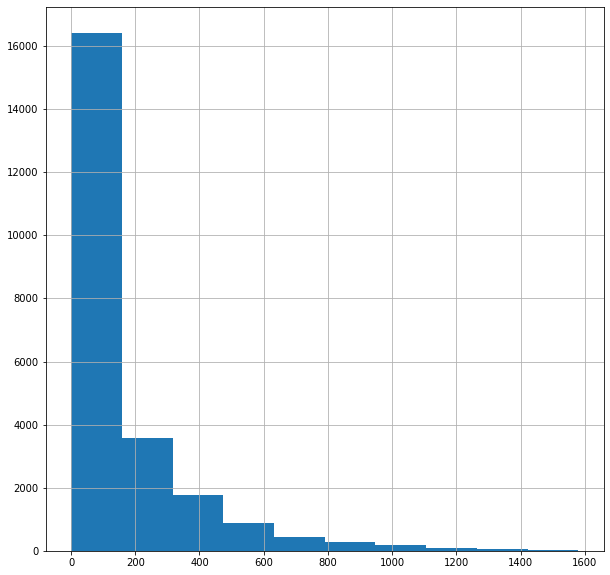

In [11]:
#Необходимо изучить как продавались квартиры. Для этого вызовем метод describe по столбцу days_exposition и посмотрим на значения
data['days_exposition'].hist(figsize=(10, 10));
print(data['days_exposition'].describe())
print('Среднее количество дней которое было размещено объявление:', data['days_exposition'].mean())
print('Медианное колечество дней которое было размещено объявление:',data['days_exposition'].median())


**Вывод:** Обычно продажа квартиры занимает не более 74 дней(это среднее значение). По 1й квартилии можно сказать, что это варианты продажи квартир самые быстрые и составляют 22 дня. Из значение квартилии 3 можно сделать вывод, что это самые медленные продажи, более 199 дней. Максимальное значние продажи квартиры в 1580 дней может быть выбросом(или же некорректно внесенные данные)

Коэффициент корреляции для total_area: 0.6537294473872788
Коэффициент корреляции для living_area: 0.566544014349503
Коэффициент корреляции для kitchen_area: 0.5198752929791636


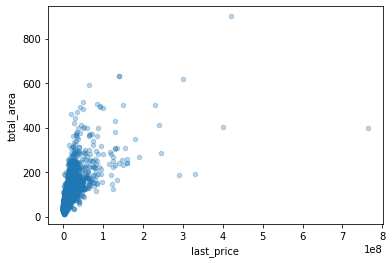

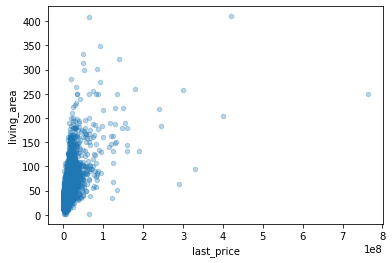

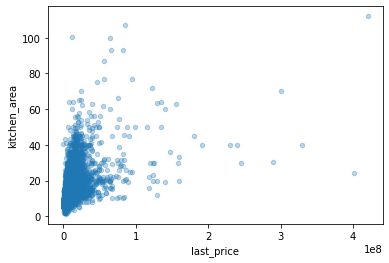

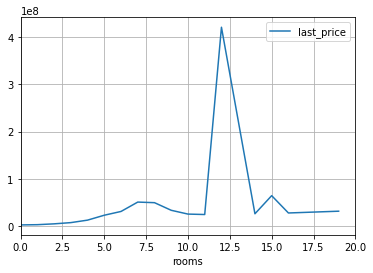

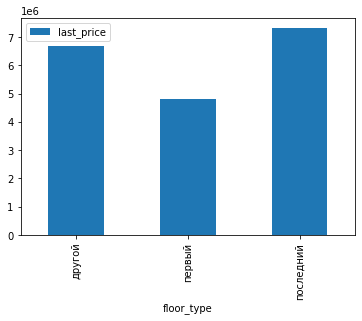

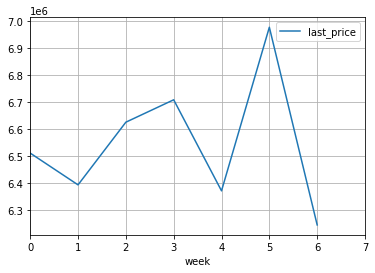

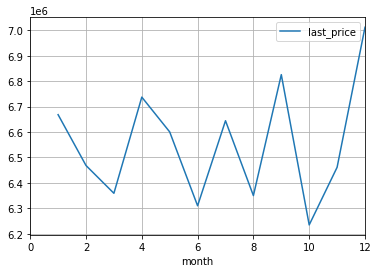

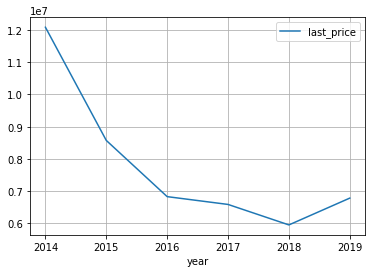

In [12]:
#Найдем зависимость цены от общей жилой площади
print('Коэффициент корреляции для total_area:', data['last_price'].corr(data['total_area']))
data.sort_values('last_price').plot(x='last_price', y='total_area', kind='scatter', alpha = 0.3)
print('Коэффициент корреляции для living_area:',data['last_price'].corr(data['living_area']))
data.sort_values('last_price').plot(x='last_price', y='living_area', kind='scatter', alpha = 0.3)
print('Коэффициент корреляции для kitchen_area:',data['last_price'].corr(data['kitchen_area']))
data.sort_values('last_price').plot(x='last_price', y='kitchen_area', kind='scatter', alpha = 0.3)
data.pivot_table(index='rooms', values = 'last_price', aggfunc = 'mean').plot(style='-', xlim=(0, 20), grid=True)
data.pivot_table(index='floor_type', values = 'last_price', aggfunc = 'mean').plot(kind='bar')
data.pivot_table(index='week', values = 'last_price', aggfunc = 'mean').plot(style='-', xlim=(0, 7), grid=True);
data.pivot_table(index='month', values = 'last_price', aggfunc = 'mean').plot(style='-', xlim=(0, 12), grid=True);
data.pivot_table(index='year', values = 'last_price', aggfunc = 'mean').plot(style='-', grid=True);

**Вывод:** Для первых трех параметров подойдет диаграмма рассеивания. Также, для каждого параметра была рассчитана корреляция на основе которой можно сделать выводы:
1. значение корреляции 0,65 параметра total_area стремится к 1, что означает есть линейная зависимость цены от общей площади(она растет)
2. значение корреляции 0,56 параметра living_area стремится к 1, что означает есть линейная зависимость цены от жилой площади(она растет)
3. значение корреляции 0,52 параметра kitchen_area стремится к 1, что означает есть линейная зависимость цены от площади кухни(она растет)

Для параметра floor_type подходит столбчатая диаграмма. На ней видно, что количество квартир в продаже на 1ом этаже меньше всего, на последнем этаже самое большое количество квартир. Между остается количество других квартир(со 2 этажа до предпоследнего этажа в доме)

В разбивке по дню недели, месяцу, году по графику видно следующее:
1. Самые дорогие квартиры продавались в субботу
2. Самый популярный месяц для продаж - декабрь
3. Стоимость квартир от 2014 год к 2018 снижалась и только в 2019 снова появился рост

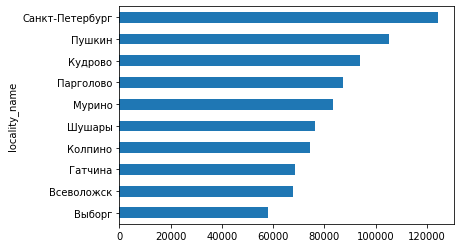

In [13]:
#Рассчитаем среднюю ценую квадратного метра в населенных пунктах с наибольшим числом объявлений
top_10p = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
top_10p.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top_10p.pop('total_area_count')
top_10p = top_10p.sort_values(by=['last_price_count'],ascending=False)
top_10p = top_10p.iloc[:10]
top_10p['price_per_sq_m'] = top_10p['last_price_sum']/top_10p['total_area_sum']
top_10p.sort_values(by=['price_per_sq_m'],ascending=True, inplace=True)
top_10p['price_per_sq_m'].plot(kind='barh');

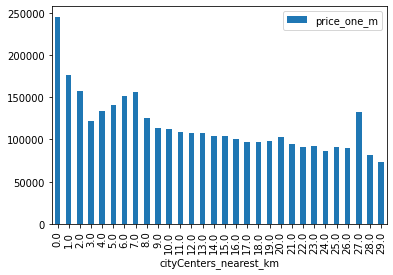

In [14]:
#5. Вычислим среднюю цену каждого километра 
data['price_one_m'] = data['last_price']/data['total_area']
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values = 'price_one_m', aggfunc = 'mean').plot(kind='bar');


**Вывод:** Построив гистограмму можно сделать вывод, что средняя цена каждого километра уменьшается от центра к окраинам города. Увеличение идет от 3 до 7 км - это похоже на такие районы города как Крестовский остров или Петроградская. Далее, стоимость снова снижается, но на 27 км снова повышается. Это похоже на Пушкинский район города в котором запрещено высокоэтажное строительство. Самая дорогая локация будет находится в районе Невского проспекта, а самая дешевая - Кудрово, Девяткино

## 5.Общий вывод

**Вывод:** Проведя исследовательский анализ полученного дата фрейма можно сделать следующие выводы:
 - какие квартиры покупают чаще, а какие квартиры самые редкие:  самые популярные объявления это квартиры с общей площадью 52-69 кв.м (2-3х комнатные квартиры) с жилой площадью 30-42 кв.м. При этом расположены такие квартиры на 4-8 этажах и имеют 1 балкон. У домов с такими квартирами чаще всего расположено по 1 пруду и парку.
 - как быстро продаются квартиры: в среднем, квартиры продаются за не более 74 дней. Самые быстрые продажи случаются за 22 дня и самые медленные 199 дней и более
 - что больше всего влияет на полную стоимость объекта: больше всего влияет на цену общая площадь квартиы, этаж, число комнат и месяц/год в который они продававлись.
 - средняя цена 1 кв.м в 10 населенных пунктах с наибольшим число объявлений: средняя цена 1 кв.м дороже всего в Санкт-Петербурге и дешевле всего в Выборге
 - где дороже всего стоят квартиры относительно центра города: от центра в радиусе 3 км находится самая дорогая недвижимость, но от 0 к 3 идет небольшое снижение; далее от 3 до 7 идет увеличение. Это похоже на такие районы города как Крестовский остров или Петроградская. Далее, стоимость снова снижается, но на 27 км снова повышается. Это похоже на Пушкинский район города в котором запрещено высокоэтажное строительство. Самая дорогая локация будет находится в районе Невского проспекта, а самая дешевая - Кудрово, Девяткино